In [ ]:
# Energy Consumption Calculator

num_devices = int(input("Enter the number of devices: "))

total_daily_energy = 0.0

for i in range(num_devices):
    print(f"\nDevice {i+1}:")
    name = input("Device name: ")
    power = float(input("Power (in watts): "))
    hours = float(input("Usage per day (in hours): "))

    daily_energy = (power * hours) / 1000  # kWh
    print(f"{name} consumes: {daily_energy:.2f} kWh per day")
    total_daily_energy += daily_energy

print(f"\n✅ Total daily energy consumption: {total_daily_energy:.2f} kWh")



Device 1:
mrecw consumes: 1.75 kWh per day

Device 2:
mrecw 1 consumes: 1.40 kWh per day

Device 3:


In [ ]:
#  Install required package
!pip install tabulate matplotlib

#  Classroom Power Consumption Estimator

from tabulate import tabulate
import matplotlib.pyplot as plt

# Step 1: Input
while True:
    try:
        num_devices = int(input("Enter the number of devices in the classroom: "))
        break  # Exit the loop if input is a valid integer
    except ValueError:
        print("Invalid input. Please enter a whole number for the number of devices.")


devices = []

for i in range(num_devices):
    print(f"\nDevice {i+1}:")
    name = input("Device name: ")
    while True:
        try:
            power = float(input("Power (in watts): "))
            break
        except ValueError:
            print("Invalid input. Please enter a number for the power.")
    while True:
        try:
            hours = float(input("Usage per day (in hours): "))
            break
        except ValueError:
            print("Invalid input. Please enter a number for the usage hours.")

    devices.append({
        'name': name,
        'power': power,
        'hours': hours
    })

# Step 2: Calculate
for device in devices:
    daily_kwh = (device['power'] * device['hours']) / 1000
    monthly_kwh = daily_kwh * 30
    device['daily_kwh'] = daily_kwh
    device['monthly_kwh'] = monthly_kwh

# Step 3: Display as table
table = []
total_daily = 0
total_monthly = 0

for d in devices:
    table.append([
        d['name'],
        f"{d['power']} W",
        f"{d['hours']} hrs",
        f"{d['daily_kwh']:.2f} kWh",
        f"{d['monthly_kwh']:.2f} kWh"
    ])
    total_daily += d['daily_kwh']
    total_monthly += d['monthly_kwh']

print("\n📊 Classroom Power Consumption Estimate:")
headers = ["Device", "Power", "Usage/Day", "Daily Consumption", "Monthly Consumption"]
print(tabulate(table, headers, tablefmt="grid"))

print(f"\n✅ Total Daily Consumption: {total_daily:.2f} kWh")
print(f"✅ Total Monthly Consumption: {total_monthly:.2f} kWh")

# Step 4: Plot bar chart
device_names = [d['name'] for d in devices]
daily_consumptions = [d['daily_kwh'] for d in devices]

plt.figure(figsize=(8,5))
plt.bar(device_names, daily_consumptions, color='lightgreen')
plt.title("Daily Energy Consumption by Device")
plt.ylabel("Energy (kWh)")
plt.xlabel("Device")
plt.show()

Enter the number of devices in the classroom: 4

Device 1:
Device name: block2 
Power (in watts): 150
Usage per day (in hours): 6

Device 2:
Device name: mrecw115
Power (in watts): 200
Usage per day (in hours): 6

Device 3:


In [ ]:
# Import all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# Load dataset
df = pd.read_csv("/content/household_energy_r6rt3f1k9p (1).csv", parse_dates=['timestamp'])
#df


In [ ]:
# Extract time features
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['weekday'] = df['timestamp'].dt.dayofweek
df['date'] = df['timestamp'].dt.date
#df

In [ ]:
# Basic summary
print("=== Basic Info ===")
print(df.info())

=== Basic Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            50 non-null     datetime64[ns]
 1   temperature          50 non-null     float64       
 2   outside_temperature  50 non-null     float64       
 3   device_usage         50 non-null     int64         
 4   energy_consumption   50 non-null     float64       
 5   hour                 50 non-null     int32         
 6   day                  50 non-null     int32         
 7   weekday              50 non-null     int32         
 8   date                 50 non-null     object        
dtypes: datetime64[ns](1), float64(3), int32(3), int64(1), object(1)
memory usage: 3.1+ KB
None


In [ ]:
print("\n=== Summary ===")
print(df.describe())


=== Summary ===
                           timestamp  temperature  outside_temperature  \
count                             50    50.000000             50.00000   
mean   2025-07-02 00:29:59.999999744    25.310800             32.44260   
min              2025-07-01 00:00:00    20.160000             25.10000   
25%              2025-07-01 12:15:00    22.792500             28.76500   
50%              2025-07-02 00:30:00    25.290000             31.99000   
75%              2025-07-02 12:45:00    27.500000             35.93500   
max              2025-07-03 01:00:00    29.770000             39.94000   
std                              NaN     2.809494              4.47634   

       device_usage  energy_consumption      hour        day    weekday  
count     50.000000           50.000000  50.00000  50.000000  50.000000  
mean       0.520000            2.944800  11.06000   1.560000   1.560000  
min        0.000000            1.150000   0.00000   1.000000   1.000000  
25%        0.000000 

In [ ]:
# Daily and Weekly Consumption Analysis
daily_consumption = df.groupby('date')['energy_consumption'].sum()
weekly_consumption = df.groupby(df['timestamp'].dt.isocalendar().week)['energy_consumption'].sum()

In [ ]:
print("\n=== Daily Consumption (First 5 Days) ===")
print(daily_consumption.head())


=== Daily Consumption (First 5 Days) ===
date
2025-07-01    67.46
2025-07-02    72.62
2025-07-03     7.16
Name: energy_consumption, dtype: float64


In [ ]:
print("\n=== Weekly Consumption (First 5 Weeks) ===")
print(weekly_consumption.head())


=== Weekly Consumption (First 5 Weeks) ===
week
27    147.24
Name: energy_consumption, dtype: float64


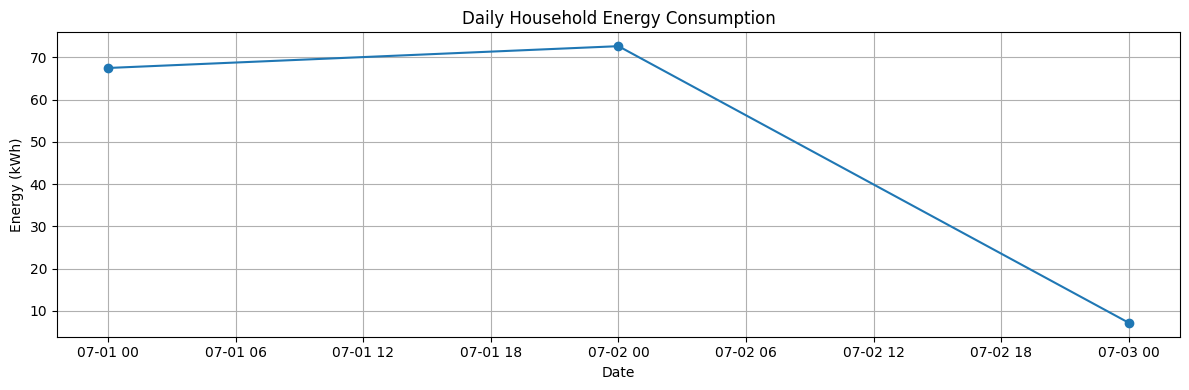

In [ ]:
# Visualize Daily Usage
plt.figure(figsize=(12, 4))
plt.plot(daily_consumption.index, daily_consumption.values, marker='o')
plt.title("Daily Household Energy Consumption")
plt.xlabel("Date")
plt.ylabel("Energy (kWh)")
plt.grid(True)
plt.tight_layout()
plt.savefig("daily_energy_plot.png")
plt.show()

In [ ]:
# Forecasting with Linear Regression
features = ['temperature', 'outside_temperature', 'device_usage', 'hour', 'weekday']
X = df[features]
y = df['energy_consumption']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\nForecasting RMSE: {rmse:.3f}")
# RMSE (Root Mean Square Error) is a statistical measure that represents the square root of the average squared differences between predicted and observed outcomes.
# It provides an indication of how well the model is performing, with lower values indicating better performance.


Forecasting RMSE: 0.700


In [ ]:
# Add forecast to full dataset
df['predicted_consumption'] = model.predict(X)

In [ ]:
# Detect inefficiencies: consumption 25% higher than moving avg (6-hour window)
df['moving_avg'] = df['energy_consumption'].rolling(window=6, min_periods=1).mean()
df['inefficient'] = df['energy_consumption'] > 1.25 * df['moving_avg']

In [ ]:
print("\n=== Inefficient Usage Entries ===")
ineff_df = df[df['inefficient']]
print(ineff_df[['timestamp', 'energy_consumption', 'moving_avg']].head())


=== Inefficient Usage Entries ===
             timestamp  energy_consumption  moving_avg
2  2025-07-01 02:00:00                3.21    2.436667
6  2025-07-01 06:00:00                3.46    2.581667
8  2025-07-01 08:00:00                3.49    2.675000
12 2025-07-01 12:00:00                3.88    2.911667
19 2025-07-01 19:00:00                4.59    2.880000


In [ ]:
# Recommendation Engine (Simple Rules)
recommendations = []

for _, row in ineff_df.iterrows():
    if row['device_usage'] > 0 and row['energy_consumption'] > 3:
        recommendations.append("Consider turning off idle devices during high-usage periods.")
    if row['outside_temperature'] > 30 and row['energy_consumption'] > 3:
        recommendations.append("High outside temp + high usage: Adjust thermostat or close blinds.")
    if row['hour'] in [0, 1, 2, 3, 4] and row['energy_consumption'] > 2:
        recommendations.append("High energy use detected at night. Investigate appliance usage.")

In [ ]:
recommendations = list(set(recommendations))
print("\n=== Recommendations ===")
for rec in recommendations:
    print(f"- {rec}")


=== Recommendations ===
- Consider turning off idle devices during high-usage periods.
- High outside temp + high usage: Adjust thermostat or close blinds.
- High energy use detected at night. Investigate appliance usage.


In [ ]:
# Install required libraries (if not already)
!pip install pandas matplotlib


In [ ]:
import random
import time
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


In [ ]:
# Simulate data: generate 50 readings
data = []

for _ in range(50):
    timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    voltage = round(random.uniform(18, 22), 2)  # volts
    current = round(random.uniform(2, 5), 2)    # amps
    power = round(voltage * current, 2)         # watts
    data.append({'timestamp': timestamp, 'voltage': voltage, 'current': current, 'power': power})
    time.sleep(0.1)  # small delay to simulate real data


In [ ]:
df = pd.DataFrame(data)
df.head()


,timestamp,voltage,current,power
0,2025-08-01 09:52:50,21.06,2.24,47.17
1,2025-08-01 09:52:50,18.59,4.90,91.09
2,2025-08-01 09:52:50,18.73,4.16,77.92
3,2025-08-01 09:52:50,21.64,4.39,95.00
4,2025-08-01 09:52:50,18.23,2.84,51.77


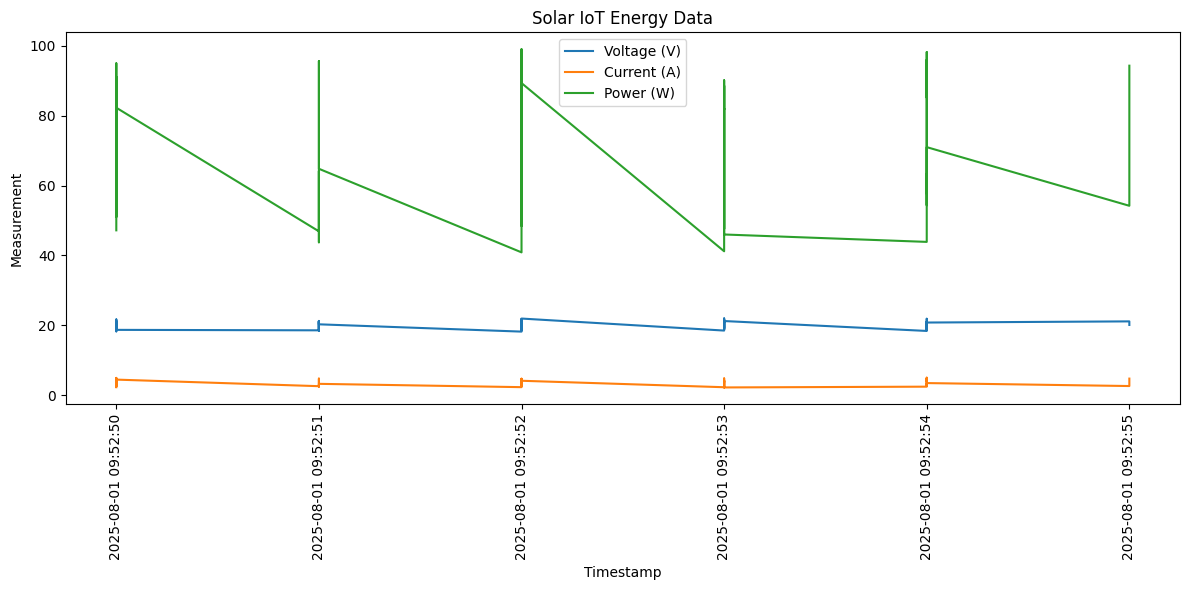

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['voltage'], label='Voltage (V)')
plt.plot(df['timestamp'], df['current'], label='Current (A)')
plt.plot(df['timestamp'], df['power'], label='Power (W)')
plt.xticks(rotation=90)
plt.title('Solar IoT Energy Data')
plt.xlabel('Timestamp')
plt.ylabel('Measurement')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
df.to_csv('solar_energy_data.csv', index=False)


In [ ]:
print(" Latest Measurements:")
print(df.tail(5))

print("\n Summary Statistics:")
print(df.describe())


⚡ Latest Measurements:
              timestamp  voltage  current  power
45  2025-08-01 09:52:54    18.66     3.39  63.26
46  2025-08-01 09:52:54    20.99     2.59  54.36
47  2025-08-01 09:52:54    20.76     3.42  71.00
48  2025-08-01 09:52:55    21.09     2.57  54.20
49  2025-08-01 09:52:55    20.07     4.70  94.33

✅ Summary Statistics:
        voltage    current      power
count  50.00000  50.000000  50.000000
mean   20.08220   3.518000  70.695000
std     1.24349   0.905622  18.728031
min    18.16000   2.170000  40.860000
25%    18.68250   2.595000  54.240000
50%    20.36000   3.405000  69.800000
75%    21.08250   4.405000  87.737500
max    21.93000   4.960000  99.040000
